## EECS 491 Assignment 1 {-}

Due Fri Feb 1 before midnight. 100 points total. (Note: the new due date differs from the syllabus, so that you have a full two weeks.)

### Submitting assignments to Canvas {-}

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.  Make sure the pdf represents the latest state of your notebook.  If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  Do not include binaries or large data files.

- Use the following format for filenames:
  - `EECS491-A1-yourcaseid.ipynb`
  - `EECS491-A1-yourcaseid.pdf`

- If you have more than these two files, put all your files in a directory named `EECS491-A1-yourcaseid`. Then zip the directory and submit it with the name `EECS491-A1-yourcaseid.zip`.  Do not use other compression formats.

Some of questions below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the reads and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

### Q1. Basic probability (10 pts) {-}

1.1. Prove (5 pts)
$$ p(x,y|z) = p(x|z)p(y|x,z) $$

proof:
$$ LHS = \frac{p(x,y,z)}{p(z)}$$
$$ RHS = \frac{p(x,z)}{p(z)}\cdot\frac{p(x,y,z)}{p(x,z)} = LHS$$

1.2. Prove (5 pts)
$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$

proof:
$$ LHS = \frac{p(x,y,z)}{p(y,z)} $$
$$ RHS = \frac{\frac{p(x,y,z)}{p(x,z)}\cdot\frac{p(x,z)}{p(z)}}{\frac{p(y,z)}{p(z)}} = LHS$$

### Q2. Independence (10 pts) {-}

2.1 Show that independence is not transitive, i.e. 
$a \perp b \wedge b \perp c \nRightarrow a \perp c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an interpretation. (5 pts)

suppose a,b and c are binary. We have $p(b = 0) = 0.2$, $p(b = 1) = 0.8$ and
$$p(a = 0, c = 0) = 0.6$$
$$p(a = 1, c = 0) = 0.1$$
$$p(a = 0, c = 1) = 0.2$$
$$p(a = 1, c = 1) = 0.1$$.

It's obvious that the joint probability of $p(a,b,c) = p(b)p(a,c)$ gives independence between b and a or c. However, since
$$p(a = 0) = 0.8$$
$$p(a = 1) = 0.2$$
$$p(c = 0) = 0.7$$
$$p(c = 1) = 0.3$$

$$p(a = 0) \cdot p(c = 0) = 0.56 \neq p(a = 0,c = 0)=0.6$$

2.2 Show that conditional independence does not imply marginal independence, i.e. $a \perp b | c \nRightarrow a \perp b$. Again provide an example. (5 pts)

We can construct a counter example:

Let $p(a = 1) = 0.4$, $p(b = 1) = 0.3$ and $p(c = 1) = 0.5$.
We have a joint probability dstribution of a,b and c:

$$p(a = 0, b = 0, c = 1) = 0.21$$
$$p(a = 0, b = 1, c = 1) = 0.09$$
$$p(a = 1, b = 0, c = 1) = 0.14$$
$$p(a = 1, b = 1, c = 1) = 0.06$$

$$p(a = 0, b = 0, c = 0) = 0.20$$
$$p(a = 0, b = 1, c = 0) = 0.10$$
$$p(a = 1, b = 0, c = 0) = 0.15$$
$$p(a = 1, b = 1, c = 0) = 0.05$$.

In this case, $a \perp b | c=1$ but a and b are not marginally indepentent.


### Q3. Inspector Clouseau re-revisited (20 pts) {-}

3.1 Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example. (5 pts)

3.2 Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonble justification for the value of each entry in $p(K|M,B)$. (5 pts)

3.3 Derive the equation for $p(M|K)$. (5 pts)

3.4 Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain. (5 pts)

#### solution 3.1

In [20]:
function fpB_K(pB,pM,pK_bm,pK_bM,pK_Bm,pK_BM)
    pb = 1 - pB
    pm = 1 - pM
    return pB*(pK_BM*pM+pK_Bm*pm)/(pb*(pK_bm*pm+pK_bM*pM)+pB*(pK_Bm*pm+pK_BM*pM))
end

pB = 0.6
pM = 0.2

pK_bm = 0.3
pK_bM = 0.2
pK_Bm = 0.6
pK_BM = 0.1


fpB_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.7281553398058251

#### solution 3.2

If we give very high values for $p(K|B,*)$, the posterior will be very high and vice versa. 

In [6]:
pB = 0.6
pM = 0.2

pK_bm = 0.1
pK_bM = 0.1
pK_Bm = 0.9
pK_BM = 0.9


fpB_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.9310344827586207

In [14]:
pB = 0.6
pM = 0.2

pK_bm = 0.95
pK_bM = 0.95
pK_Bm = 0.05
pK_BM = 0.05


fpB_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.07317073170731708

#### solution 3.3

$B$ and $M$ are symmetric.
$$ p(M|K) = \frac{p(M)\sum_{b}p(K|b,M)p(b)}{\sum_{m}p(m)\sum_{b}p(K|b,m)p(b)}$$


#### solution 3.4

In [32]:
function fpM_K(pB,pM,pK_bm,pK_bM,pK_Bm,pK_BM)
    pb = 1 - pB
    pm = 1 - pM
    return pM*(pK_bM*pb+pK_BM*pB)/(pm*(pK_bm*pb+pK_Bm*pB)+pM*(pK_BM*pB+pK_bM*pb))
end

pB = 0.6
pM = 0.2

pK_bm = 0.3
pK_bM = 0.2
pK_Bm = 0.6
pK_BM = 0.1


fpM_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.06796116504854369

In [36]:
pK_bm = 0.1
pK_bM = 0.1
pK_Bm = 0.9
pK_BM = 0.9

fpM_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.2

In [30]:
pK_bm = 0.95
pK_bM = 0.95
pK_Bm = 0.05
pK_BM = 0.05

fpM_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.2

If we assign higher values to $p(K|*,M)$, the response will be higher. 

In [37]:
pK_bm = 0.1
pK_bM = 0.9
pK_Bm = 0.1
pK_BM = 0.9

fpM_K(pB, pM, pK_bm, pK_bM, pK_Bm, pK_BM)

0.6923076923076923

For $p(B|K)$, the main factors are $p(B)$ and $p(K|B,*)$. The same follows when comes to $p(M|K)$.

### Q4. Biased views (20 pts) {-}

4.1 Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel to use a package where the necessary distributions are defined as primitives. (5 pts)

4.2 Imagine three different views on the coin bias:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- "I believe strongly that the coin is unbiased".
- "I don't know anything about the bias of the coin."
Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation. (5 pts)

4.3 Perform Bernoulli trials where one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n=0, 1, 2, 5, 10, \textrm{and} 100$.  Each view should have its own plot, with the plots of the posterior after different numbers of trials overlayed. (5 pts)

4.4 Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials? (5 pts)

#### solution 4.1

The posterior for $\theta$ is:
$$p(\theta|y,n) = Binomial(n,y) \cdot \theta^y \cdot (1-\theta)^{1-y} \cdot p(\theta) \cdot (n+1)$$

In [259]:
using Distributions
f(θ, y, n, prior) = binomial(n, y) * θ^y * (1-θ)^(n-y) * (n+1) * pdf.(prior,θ:1:θ)[1]

f (generic function with 2 methods)

#### solution 4.2

- The probability of $\theta$ being very high and low should be high, so the first one should be a "U" like distribution. We can have $Beta(0.5,0.5)$


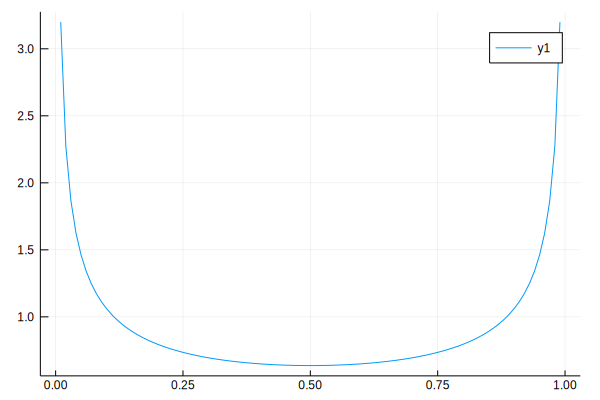

In [340]:
using Plots
plot(0:0.01:1,pdf.(Beta(0.5, 0.5), 0:0.01:1))

- The second could be $Beta(80,80)$ 

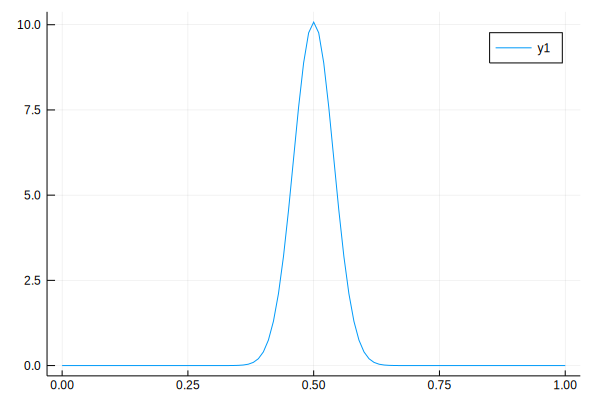

In [330]:
plot(0:0.01:1,pdf.(Beta(80, 80), 0:0.01:1))

- The last one should be a horizontal line, for which we have $Beta(1,1)$.

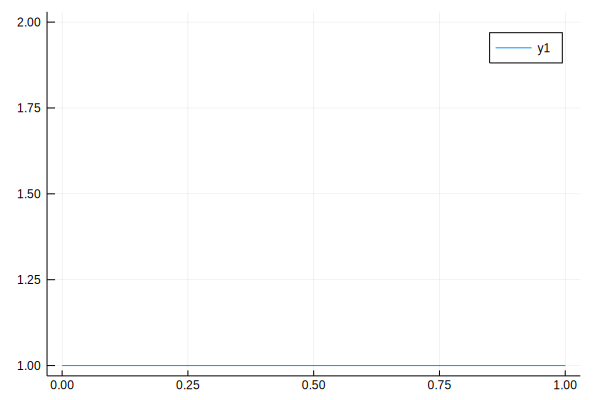

In [66]:
plot(0:0.01:1,pdf.(Beta(1, 1), 0:0.01:1))

#### solution 4.3

We will choose $\theta=0.8$ which is in consistence with view 1. 

- View 1

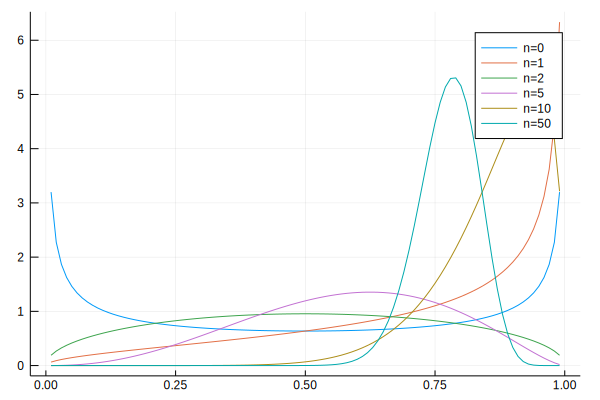

In [352]:
θ = 0.8
totaln = 50
trials = rand(Bernoulli(θ), totaln)
y = sum(trials[1 : totaln])
plot!(0:0.01:1, f.(0:0.01:1, y, totaln,Beta(0.5,0.5)),label = "n=$totaln",legend=true)

- View 2

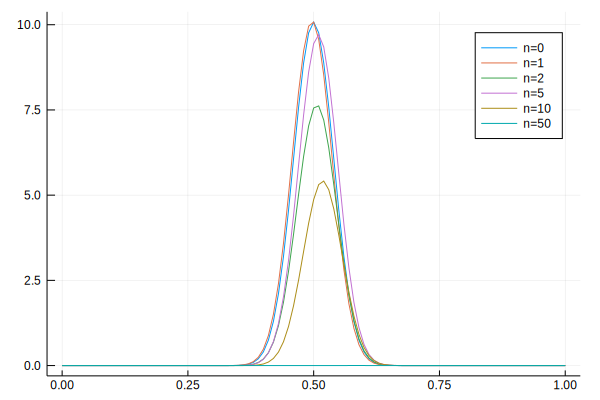

In [329]:
θ = 0.8
totaln = 50
trials = rand(Bernoulli(θ), totaln)
y = sum(trials[1 : totaln])
plot!(0:0.01:1, f.(0:0.01:1, y, totaln,Beta(80,80)),label = "n=$totaln",legend=true)

- View 3

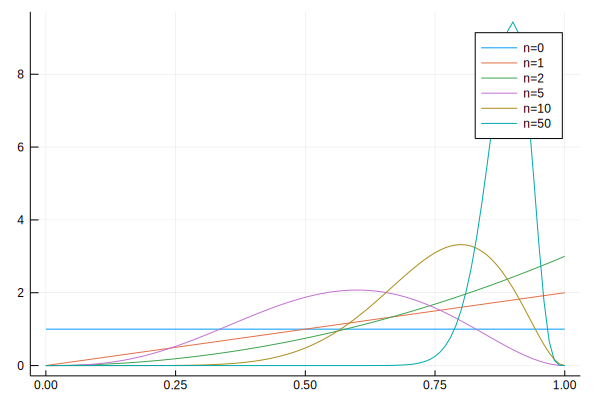

In [298]:
θ = 0.8
totaln = 50
trials = rand(Bernoulli(θ), totaln)
y = sum(trials[1 : totaln])
plot!(0:0.01:1, f.(0:0.01:1, y, totaln,Beta(1,1)),label = "n=$totaln",legend=true)

#### solution 4.4

I think they will eventually arrive at the accurate estimation. But if the prior is too far from the truth, we will need more evidence to change it. Like in the figure for `view 2`, the posterior doesn't change a lot after 50 trials. Calculating $Binomial(n,y)$ for too large an $n$ will cause overflow. So we can have another way to verify. $Beta$ ditribution is the conjugate prior of $binomial$, so we can iteratively substitude our prior with the posterior when we have a new outcome(I don't know for sure if this is correct...).

In [359]:
function infer_iter(θ,totaln,prior::Beta)
    for i=1:totaln
        trial = rand(Bernoulli(θ), 1)[1]
        prior = Beta(prior.α+trial,prior.β+1-trial)
    end
    return prior
end

infer_iter (generic function with 1 method)

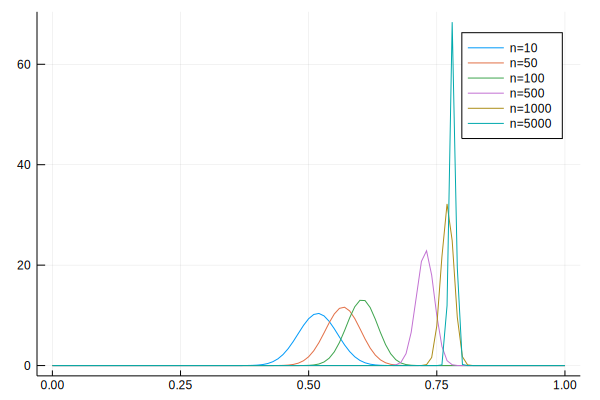

In [380]:
totaln = 5000
plot!(0:0.01:1,pdf.(infer_iter(0.8,totaln,Beta(80,80)),0:0.01:1),label = "n=$totaln",legend=true)

We can see after 5000 trials, the posterior is quite accurate. Maybe a possible way to determine which prior is closer the the true distribution is to examine how sharpe the curve for posterior is. The curve for view 2 actually flattens when the number of trials goes up.  

### Q5. Inference using the Poisson distribution (20 pts) {-}

Suppose you are observing a series of events that occur at the following times (in seconds): 0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48.

5.1 Model the rate at which the events are produced using a Poisson distribution where $\lambda$ is the number of events $n$ observed per unit time (1 second).  Show the likelihood equation and plot it for three different values of $\lambda$: less, about equal, and greater than what you estimate (intuitively) from the data. (5 pts)

5.2 Derive the posterior distribution of $\lambda$ assuming a Gamma prior (usually defined with parameters $\alpha$ and $\beta$).  The posterior should have the form $p(\lambda | n, T, \alpha, \beta)$ where $T$ is the total duration of the observation period and $n$ is the number of events observed within that period. (5 pts)

5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

5.4 Plot the posterior distribution for the data above at times $T$ = 0, 0.5, and 1.5.  Overlay the curves on a single plot.  Comment how it is possible for your beliefs to change even though no new events have been observed. (5 pts)


#### solution 5.1

We can estimate $\lambda$ to be 9/2.48. If the data are produced from a Poisson distribution, the likelihood in the bayesian equation should be:

$$ p(X = n) = \frac{\lambda^n e^{-\lambda}}{n!}$$

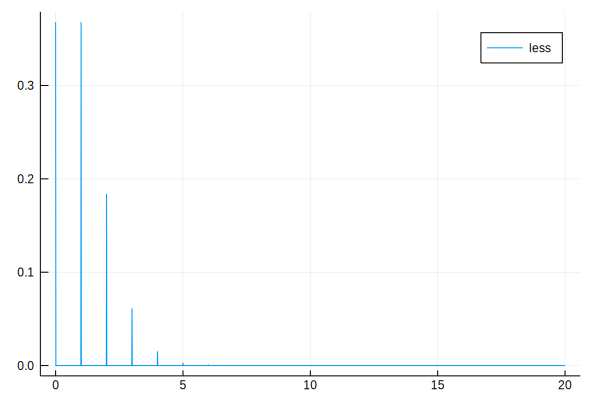

In [559]:
plot(0:0.01:20,pdf.(Poisson(1.0),0:0.01:20),label="less")

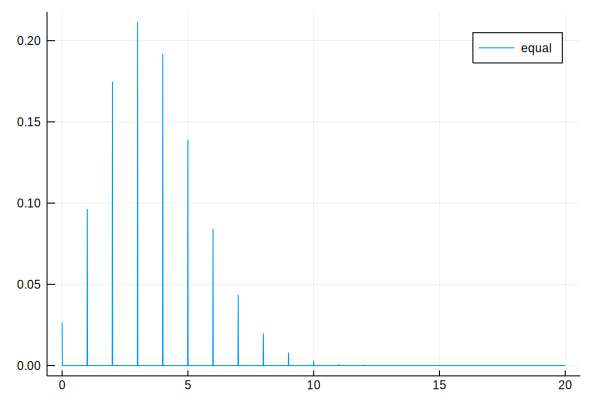

In [395]:
plot(0:0.01:20,pdf.(dis,0:0.01:20),label="equal")

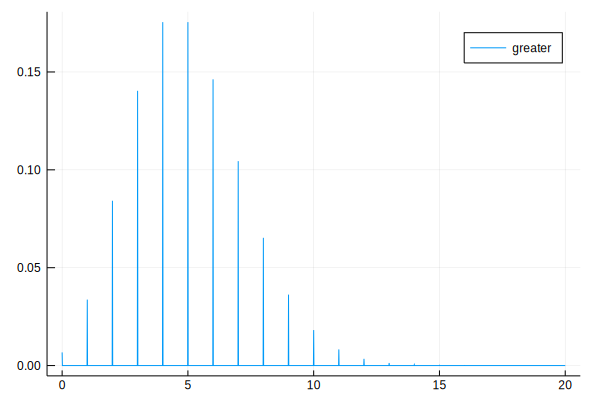

In [399]:
plot(0:0.01:20,pdf.(Poisson(5),0:0.01:20),label="greater")

#### solution 5.2
The posterior is:

$$p(\lambda|n) = \frac{p(n|\lambda)p(\lambda)}{\sum_\lambda p(n|\lambda)p(\lambda)}$$
$$p(\lambda|n,T,\alpha,\beta) = constant \cdot \frac{(\lambda T)^{n}e^{-\lambda T}}{n!} \cdot \Gamma(\alpha,\beta)|_\lambda$$

#### solution 5.3

$$ Gamma(\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$$

$$ \frac{\lambda^ne^{-\lambda}}{n!} \cdot \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda} = constant \cdot \lambda^{\alpha+n-1}e^{-(\beta+1)\lambda} = constant \cdot Gamma(\alpha+n,\beta+1)$$

So $Gamma$ distribution is the conjugate prior of $Poisson$ distribution.

#### solution 5.4

We implement the posterior in 5.2 and use $Gamma(2,2)$ as the prior.

In [525]:
f(r,n,t,a,b) = (r*t)^n*exp(-r*t)*pdf.(Gamma(a,b),r:1:r)[1]/factorial(n)

f (generic function with 3 methods)

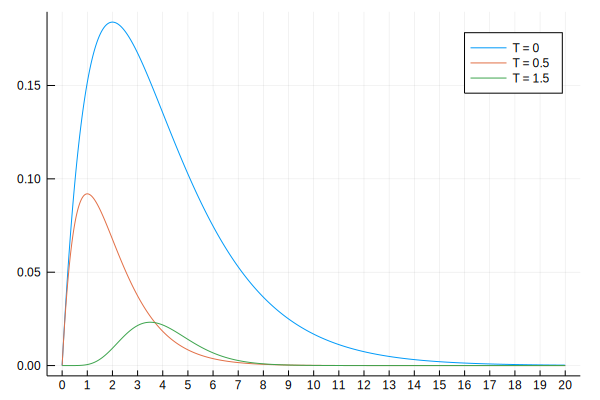

In [558]:
plot(0:0.01:20,f.(0:0.01:20,0,0,2,2),xaxis=0:1:20,label="T = 0")
plot!(0:0.01:20,f.(0:0.01:20,0,0.5,2,2),xaxis=0:1:20,label="T = 0.5")
plot!(0:0.01:20,f.(0:0.01:20,6,1.5,2,2),xaxis=0:1:20,label="T = 1.5")

Even though there is no events observed, the curve for $T = 0.5$ still changed from that of $T = 0$. Because if we observe no event in a longer time period, the estimation of $\lambda$ should be lower.

### Q6. Exploration (20 pts) {-}

In these problems, you are meant to do creative exploration.  Define and explore a:

6.1 discrete inference problem (10 pts)

6.2 continuous inference problem (10 pts)

This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  The general idea is for you to teaching yourself (and potentially a classate) about something.  You don't necessarily have to know what that is when you start, but you should be able to express what you learned.

Here is the grading rubric:
- Were the problem clearly described and concise? (3 pts)
- Were the relevant concepts clearly explained? (3 pts)
- Did the problem go beyond or is distinct from what was already convered in the questions above? (4 pts)

You can use the readings and other sources for inspiration, but here are a few ideas:
- An inference problem using categorical data
- A disease for which there are two different tests
- A two-dimensional continuous inference problem


#### Discrete Inferencing

See another file.

#### Continuous Inferencing

We will try to solve the estimation of $\lambda$ in Q5 with MLE.

We have the times when events are observed:

In [560]:
events = [0.53,0.65,0.91,1.19,1.30,1.33,1.90,2.01,2.48]

9-element Array{Float64,1}:
 0.53
 0.65
 0.91
 1.19
 1.3 
 1.33
 1.9 
 2.01
 2.48

We can transform the data into time intervals.

In [561]:
intervals = diff(events)

8-element Array{Float64,1}:
 0.12                
 0.26                
 0.2799999999999999  
 0.1100000000000001  
 0.030000000000000027
 0.5699999999999998  
 0.10999999999999988 
 0.4700000000000002  

The intervals means how long does it take to observe exactly one event. This is subjected to $Poisson$ distribution:

$$p(T = T_i) = \frac{(\lambda T_i)^1e^{-\lambda T_i}}{1!}$$

We can have the likelyhood of all the observations:

$$p(\bar T) = \prod_i \lambda T_i e^{-\lambda T_i}$$

The log likihood is:

$$log(p(\bar T)) = |\bar T|log(\lambda)+\sum_ilog(T_i)-\lambda\sum_i T_i$$

We can implement this log liklihood and plot the curve for it given $\lambda \in [0,20].$

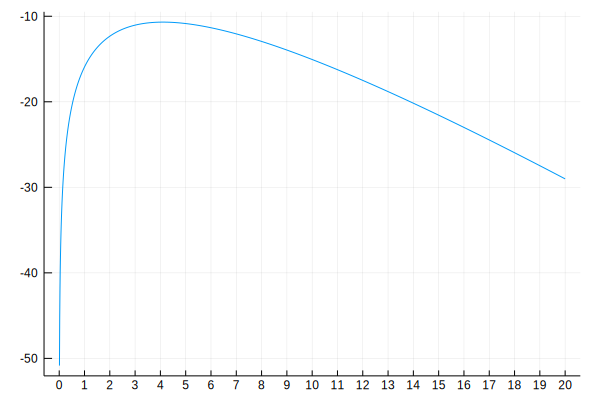

In [584]:
lgL(lambda) = sum(log.((lambda.*exp.(-lambda.*intervals).*intervals)))
plot(0:0.01:20,lgL.(0:0.01:20),xaxis=0:1:20,legend=false)

In [585]:
argmax(lgL.(0:0.01:20))/100

4.11

The $\lambda$ that gives maximum response is 4.11.